## Quantum Dynamical Model for a Frenkel Exciton 
[Jay Foley and Lane Tolley, University of North Carolina Charlotte](https://foleylab.github.io/)

#### objectives
-Implement function that will build the Hamiltonian for a Frenkel Exciton within a 2D film

#### Summary
The time evolution of energy transferred within a 2D crystalline organic film can be described with excitonic degrees of freedom; the purpose of this notebook is to implement a function that will build the hamiltonian for such a system.
    

## Import libraries

In [2]:
import numpy as np
import scipy
import math
from matplotlib import pyplot as plt
# Will come back and create a vizualization 

## Theory

The time evolution of energy transfer within a crystalline 2D film of a few organic monomers can be described with excitonic degrees of freedom. 

Quantum dynamical systems can be described with the time dependent Schrodinger equation (TDSE):

$$ i\hbar \frac{d}{dt}\Psi(x,t) = \hat{H} \Psi(x,t) \tag{1} $$

The Hamiltonian $\hat{H}$ of this system is comprised of three changeable parameters: the number of basis sets, the exciton energy, and interparticle coupling. The number of basis sets will change based upon the number of monomers included within the system, the exciton energy is a value that will be approximated and chosen for the system, and the coupling term will require the use of another function, $\hat{V}_{nm}$:

$$ V_{nm} = \frac{1}{{n^2}{r^3}} \left( \mu_n\cdot \mu_m - 3\frac{(\mu_n \cdot {\bf r})({\bf r} \cdot \mu_m)}{r^2}\right) \tag{2} $$
where $\mu_n$ is the transition dipole moment associated with the exciton on site $n$, ${\bf r}$ denotes the separation vector between site $n$ and $m$, and $r$ denotes the scalar separation between $n$ and $m$. 


# Realistic Paramters for TTz Dyes 
### 2D Spacing
$ [i, j, k] = [18.77, 10.39, 0] \space \text{Angstrom} =  \textbf{[35.47, 19.63, 0] au}   $
### Exciton Energy Parameters
$ \lambda = \textbf{460 nm} $

$E = 4.318*10^{-19} \space J = 2.695  eV = \textbf{0.099 au} $
    
    

## Exciton Bohr Radius

$ a_B^{2D} = \frac{4 \pi \varepsilon_0 \hbar^2}{ \mu e^2} $

$ \mu = \frac{(9.1093837 * 10^{-31} kg)(9.1093837 * 10^{-31} kg)}{(9.1093837 * 10^{-31} kg) + (9.1093837 * 10^{-31} kg)} = 4.5546919 * 10^{-31} kg $

$ a_B^{2D} = \frac{4 \pi (8.854*10^{-12} \space \text{F/m})(\frac{6.626*10^{-34} Js}{2\pi})^2}{ (4.5546919 * 10^{-31} \text{kg})(1.6021766 * 10^{-19} c)^2} = 1.0583*10^{-10} \space \text{m} = \bf{1.9999 \space \text{a.u.}}  $


In [3]:
def compute_dd_coupling(mu_d, mu_a, r_vector, n):
    """ Function that computes the dipole dipole coupling contribution of the total energy of a system based upon mu_d,
        the transition dipole moment of the donor, mu_a, the transition dipole moment of the acceptor, r_vector, the 
        distance separating the donor and acceptor, and the refractive index, a paremeter that describes the effect of 
        the system on light.
    
    Arguments
    ---------
    mu_d : numpy array of floats
        the transition dipole mooment of the donor
    mu_a : numpy array of floats
        the transition dipole moment of the acceptor
    r : numpy array of floats
        the distance separating the donor and acceptor
    n : float
        refractive index of the medium
    """

    r_scalar = np.sqrt(np.dot(r_vector, r_vector))
    
    return (1 / (n ** 2 * r_scalar ** 3)) * (np.dot(mu_d, mu_a) - 3 * (np.dot(mu_d, r_vector) * np.dot(r_vector, mu_a)) / r_scalar ** 2)

mu_d1 = np.array([0,0,0.5]) 
mu_a1 = np.array([0,0,0.5])
r_1 = [1,0,0] 
n_1 = 1.0

dd_1 = compute_dd_coupling(mu_d1, mu_a1, r_1, n_1)
print(dd_1)

# only change x and z designation for mu_a and mu_d (2D)
    

0.25


We will add test cell here for the compute_dd_coupling function.  The scaling of the $V$ as a function of $r$ should go as $\frac{1}{r^3}$.  

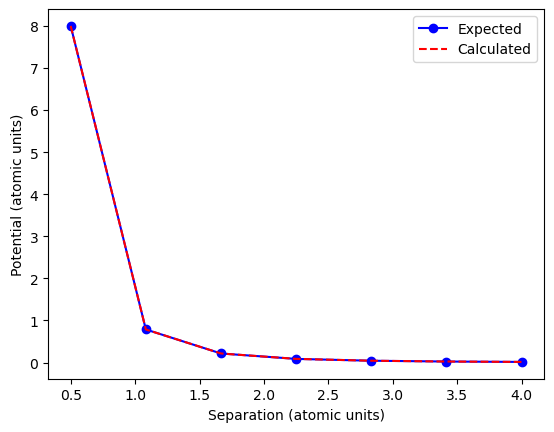

In [4]:
# mu_1
mu_1 = np.array([0,0,1]) 

# mu_2
mu_2 = np.array([0,0,1])

# refractive index
n = 1.0

# create an array of scalar separation values ranging from 0.5 - 2.5
r_vals = np.linspace(0.5, 4, 7)

# get shortest separation vector
r_i = [r_vals[0],0,0] 

# get the potential corresponding to shortest separation vector
V_i = compute_dd_coupling(mu_1, mu_2, r_i, n)

# expected V as a function of r
expected_V_of_r = V_i * (r_vals[0] / r_vals) ** 3

# now calculate V of r using the function
V_of_r = np.zeros_like(r_vals)

# now call compute_dd_coupling for each separation vector
for i in range(len(r_vals)):
    r_i = [r_vals[i], 0, 0]
    V_r = compute_dd_coupling(mu_1, mu_2, r_i, n)
    V_of_r[i] = V_r


plt.plot(r_vals, expected_V_of_r, "bo-", label="Expected")
plt.plot(r_vals, V_of_r, 'r--', label="Calculated")
plt.xlabel("Separation (atomic units)")
plt.ylabel("Potential (atomic units)")
plt.legend()
plt.show()

assert np.allclose(V_of_r, expected_V_of_r)

## The Frenkle Exciton Hamiltonian
The Hamiltonian of this system can be tentatively described by eqation 3:

$$ \hat{H}_F = \hat{H}_0 + \hat{V}. \tag{3} $$

Using the notation from [Willard and co-workers](https://pubs.acs.org/doi/10.1021/acs.jpcc.8b11504)  

\begin{equation}
\hat{H}_0 = \sum_n \epsilon_n |n \rangle \langle n | 
\end{equation}
and 
\begin{equation}
\hat{V} = \sum_{nm} V_{nm} |n\rangle \langle m|
\end{equation}

Here the projection operators will lead to diagonal contributions for $\hat{H}_0$ 
\begin{align}
\langle p | \hat{H}_0 | q \rangle &= \langle p | \sum_n \epsilon_n |n \rangle \langle n |  q \rangle \\
&= \langle p | \epsilon_q |q \rangle \langle q |  q \rangle \\ 
& = \langle p | \epsilon_q |q \rangle \cdot 1 \\
&= \epsilon_q \langle p | q \rangle \\
&= \epsilon_q \delta_{pq}    
\end{align}
and off-diagonal contributions for $\hat{V}$:
\begin{align}
\langle p | \hat{V} | q \rangle &= \langle p | \sum_{nm} V_{nm} |n \rangle \langle m |  q \rangle \\
&= \langle p | \sum_{n} V_{nq} |n \rangle \langle q |  q \rangle \\ 
& = \langle p | \sum_{n} V_{nq} |n \rangle \cdot 1 \\
& =  \sum_{n} V_{nq} \langle p | n \rangle  \\
&= \sum_{n} V_{nq}\delta_{pn}  \\ 
&= V_{pq}
\end{align}
where we note that an exciton does not interact with itself through this potential, so elements $V_{qq}$ are necessarily zero.

## Photon-Exciton Coupling
The total Hamiltonian for the system also necessarily includes terms for photons emmitted by relaxation of excitons, and coupling between thew two. The total Hamiltonian will take the form of equation 4:

$$ \hat{H}_T = \hat{H}_F + \hat{H}_P + \hat{H}_I  \tag{4}$$ 

where $ \hat{H}_F $ is the Frenkel exciton hamiltonian described above, $ \hat{H}_P $ is the hamiltonian of a photon emitted by exciton relaxation, and $ \hat{H}_I $ is the coupling between an exciton and its associated photon, and are described by the following equations:

$$ \hat{H}_P | n \rangle = \hbar \omega (n + \frac{1}{2}) \tag{5} $$
$$ \hat{H}_I = \color{blue}{g a^\dagger_g a_e b^\dagger} + \color{red}{g a^\dagger_e a_g b} \tag{6} $$

Where $ b^\dagger $ and  $ b $ are raising and lowering operators, respectively, I.E.:

$$ b^\dagger | 0 \rangle = \sqrt{1} | 1 \rangle $$
$$ b | 1 \rangle = \sqrt{1} | 0 \rangle $$

In other words:

$ \color{blue}{g a^\dagger_g a_e b^\dagger} $ describes the emission of photons to increase population of the ground state

$ \color{red}{g a^\dagger_e a_g b} $ decsribes the absorption of photons to increase the population of the excited state

and g is the exciton-photon coupling strength:

$$ g \space \propto \space \sqrt{\frac{1}{V}} * \mu $$

Where V is the volume of the cavity and $ \mu $ is the transition dipole moment

In [5]:
def H0_matrix_element(n, m, epsilon_m):
    """ Helper function to take two indices (n, m) and return the H_0 matrix element H_{n,m}, 
        which is <n|H_0|m> in Dirac's Bra-Ket notation.
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    epsilon_m : float
        the exciton energy of site m
    
    Returns
    -------
    H_nm : float 
        Hamiltonian matrix element <n|H_0 | m> = \epsilon_m <n|m>
    
    """
    H_nm = epsilon_m * (n == m)
    
    return H_nm

def V_matrix_elements(n, m, V_AD):
    """ Helper function to take two indices (n, m) and return the V matrix element V_{n,m}, 
        which is <n|V|m> in Dirac's Bra-Ket notation.
    
    Arguments
    ---------
    n : int
        the index corresponding to the bra state
    m : int
        the index corresponding to the ket state 
        
    mu_n : float (vector with x, y, and z components)
        transition dipole moment for site n
        
    mu_m : float (vector with x, y, and z components)
        transition dipole moment for site m
        
    r_nm : float (vector with x, y, and z components)
        separation vector between sites n and m
    
    Returns
    -------
    V : float 
        Hamiltonian matrix element <n|V | m> = V_nm
    
    """
    pass


def build_hamiltonian(n_basis, exciton_energy, V_AD):
    """ Function that builds the Hamailtonian which models the time evolution of an excitonic system based upon the
        field free energy of the system and the dipole dipole coupling of the sysetem
        
    Arguments
    ---------
    H_o : numpy array of floats
        a numpy array of spectral data fed to the function
    V_AD : Float
        dipole dipole coupling term that is given by the compute_dd_coupling() functionFunction that builds the Hamailtonian which models the time evolution of an excitonic system based upon the
        field free energy of the system and the dipole dipole coupling of the sysetem
        
    """
    
    H = np.zeros((n_basis, n_basis))
    
    for i in range(n_basis):
        n = i 
        for j in range(n_basis):
            m = j 
            H[i, j] = exciton_energy + V_AD
    return H

build_hamiltonian(2, 1, dd_1)


array([[1.25, 1.25],
       [1.25, 1.25]])

Test cell for the Hamiltonian functions

In [10]:
#Exciton Wavelength to Energy Conversion

#insert wavelength in nm here 
wvl = 370

#Constants and conversion factors
hp = 6.626 * 10 ** (-34)
ltspd = 2.998 * 10 ** 8
jtH = 2.294 * 10 ** 17

epsilon = (hp * ltspd / (wvl * 10 ** (-9))) * jtH

# define some expected H0 matrix values
expected_H_11 = epsilon
expected_H_12 = 0
expected_H_22 = epsilon
expected_H_21 = 0

H_11 = H0_matrix_element(1, 1, epsilon)
H_12 = H0_matrix_element(1, 2, epsilon)
H_22 = H0_matrix_element(2, 2, epsilon)
H_21 = H0_matrix_element(2, 1, epsilon)

# now check to make sure these check out
assert np.isclose(H_11, expected_H_11)
assert np.isclose(H_12, expected_H_12)
assert np.isclose(H_22, expected_H_22)
assert np.isclose(H_21, expected_H_21)



In [12]:
#cm^-1 to Hartree
wvnH = 4.55633 * 10 ** (-6)
jcoul = 299 * wvnH

hamiltonian_matrix = build_hamiltonian(2, epsilon, jcoul)
E_spec = np.linalg.eigh(hamiltonian_matrix)
print(E_spec)

(array([0.        , 0.24904756]), array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]]))


One note about the build_hamiltonian function:

I imagine we will want to pass information about the geometry of the thin film as an array of cartesian coordinates that gives the center of mass for each monomer.  Therefore, the site basis can be thought of as a real-space basis so that state $|n\rangle$ sits at coordinates ${\bf x}_n = (x_n, y_n, z_n)$.  When we evauate the potential between states $|n\rangle$ and $|m\rangle$, we will define the displacement vector as
${\bf r}_{nm} = ((x_m - x_n), (y_m - y_n), (z_m - z_n))$.

So, I think we will want to have the build_hamiltonian to accept an array of cartesian coordinates for all monomoers.  We can do a first test with a dimer along the lines of 

${\bf x} = ((0, 0, 0), (1, 0, 0))$ which would have a displacement vector ${\bf r} = (1, 0, 0)$.

In [8]:
c_vector = np.zeros((2, 1),  dtype=complex)  # <== wavefunction coefficient vector
        # Probably want to allow the user to specify an initial state!
        # but right now just have the initial state with exciton localized on site 1
c_vector[0] = 1 + 0j
density_matrix = np.dot(c_vector, np.conj(c_vector.T))

In [9]:
print(c_vector)
print(density_matrix)

[[1.+0.j]
 [0.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]
